In [26]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
from pprint import pprint

In [1]:
document = open('MapOfScience.gml', 'r').read()
document = document.split('Version 1.0')[1]
document = document.split('node\n')[1:]
nodes = document[:687]
nodes.append(document[686:][0].split('edge')[0])
final_nodes=[]
node_classes = {'Social':0,'Formal':0,'Natural':0,'Applied':0}
for node in nodes:
    node_id = int(node.split('id')[1][:5].split(' ')[1])
    node_name = node.split('name "')[1].split('"')[0]
    node_class = node.split('Class "')[1].split('"')[0]
    node_url = node.split('WikipediaUrl "')[1].split('"')[0]
    final_nodes.append((node_id, {'name':node_name,'class': node_class,'url': node_url }))
    node_classes[node_class] = node_classes[node_class] + 1

In [2]:
G = nx.Graph()
G.add_nodes_from(final_nodes)
    
edges = document[686:][0].split('edge')[1:]
final_egde = [] 

for edge in edges:
    source = int(edge.split('source')[1][:5].split(' ')[1])
    target = int(edge.split('target')[1][:5].split(' ')[1])
    CosineSimilarity = float(edge.split('CosineSimilarity')[1][:18].split(' ')[1])
    G.add_edge(source, target, weight = CosineSimilarity)

for i in node_classes:
    node_classes[i] = node_classes[i]/len(G)

In [3]:
print(nx.info(G)) 
print('\nExample node: ')
print(final_nodes[0])
print('\nPercentage of node science classes: ')
pprint(node_classes)

Name: 
Type: Graph
Number of nodes: 687
Number of edges: 6523
Average degree:  18.9898

Example node: 
(0, {'name': 'Accounting', 'class': 'Applied', 'url': 'https://en.wikipedia.org/wiki/Accounting'})

Percentage of node science classes: 
{'Applied': 0.13682678311499272,
 'Formal': 0.28093158660844253,
 'Natural': 0.24890829694323144,
 'Social': 0.33478893740902477}


In [4]:
#We can see that 
print('Connected components outside of the main component:')
sorted(nx.connected_components(G), key = len, reverse=True)[1:]

Connected components outside of the main component:


[{327, 484, 569}, {377, 401, 615}, {42, 67}, {500, 598}]

In [5]:
nodeDict = dict(G.nodes(data=True))
for i in sorted(nx.connected_components(G), key = len, reverse=True)[1:]:
    for j in i:
        print(nodeDict[j]['name']+' as a '+nodeDict[j]['class']+' Science')
    print('\n')
    
#Here we can see the Science pages that were not 
#connected to the main component

Hydrography as a Social Science
Coastal geography as a Social Science
Coastal geography as a Natural Science


Marine biology as a Natural Science
Oceanography as a Natural Science
Oceanography as a Social Science


Food science as a Applied Science
Nutrition as a Applied Science


Cuisine as a Social Science
Meal as a Social Science




In [39]:
#POWER LAW

data = []
for i in list(G.degree()):
    data.append(i[1])# data can be list or numpy array

fit = powerlaw.Fit(data)
print(f'gama = {fit.power_law.alpha} = alpha in the article')
print(f'sigma = {fit.power_law.sigma}')
print(f"(power law, exponential) comparation between both")
print(fit.distribution_compare('power_law', 'exponential'))

NameError: name 'powerlaw' is not defined

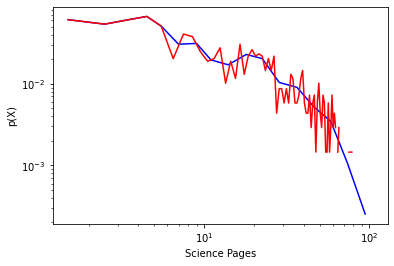

In [9]:
figPDF = powerlaw.plot_pdf(data, color='b')
powerlaw.plot_pdf(data, linear_bins=True, color='r', ax=figPDF)

figPDF.set_ylabel("p(X)")
figPDF.set_xlabel(r"Science Pages")
plt.show()

C:\Users\danie\anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


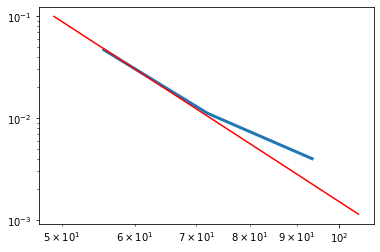

In [10]:
fit.distribution_compare('power_law', 'lognormal')
fig4 = fit.plot_pdf(linewidth = 3)
fit.power_law.plot_pdf(ax = fig4, color = 'r', linestyle = '-')

plt.show()

In [ ]:
#END OF POWER LAW CODE

In [6]:
#Centrality
def get_max_dic(dic):
    maxy = float(0.00)
    max_id = 0
    for i in range(len(dic)):
        if dic[i] > maxy:
            maxy = dic[i]
            max_id = i

    nodeDict = dict(G.nodes(data=True))
    #print(max_id)
    return nodeDict[max_id]
print('degree_centrality: ')
pprint(get_max_dic(nx.degree_centrality(G)))
print('eigenvector_centrality: ')
pprint(get_max_dic(nx.eigenvector_centrality(G)))
print('betweenness_centrality: ')
pprint(get_max_dic(nx.betweenness_centrality(G)))


degree_centrality: 
{'class': 'Social',
 'name': 'School psychology',
 'url': 'https://en.wikipedia.org/wiki/School_psychology'}
eigenvector_centrality: 
{'class': 'Social',
 'name': 'School psychology',
 'url': 'https://en.wikipedia.org/wiki/School_psychology'}
betweenness_centrality: 
{'class': 'Natural',
 'name': 'Population biology',
 'url': 'https://en.wikipedia.org/wiki/Population_biology'}


In [41]:
bet_dict = nx.betweenness_centrality(G)
sorted_bet_dict = [k for k, v in sorted(bet_dict.items(), key=lambda item: item[1])]
for i in sorted_bet_dict[-3:]:
       print(nodeDict[i]['name']+' as a '+nodeDict[i]['class']+' Science')
#Here we see the 3 pages with highest betweenness centrality ascending

Economics as a Social Science
Algorithm as a Formal Science
Population biology as a Natural Science


Transitivity:  0.4692818869510401
Global Clustering Coefficient:  0.530269857355329 

------ CC of nodes from BC ------
Name:  Population biology | CC: 0.13279678068410464
Name:  Algorithm | CC: 0.23865546218487396
Name:  Economics | CC: 0.2664224664224664 

------ High CC of nodes near BC ------
Name:  Population ecology | CC: 0.9
Name:  Algebraic topology | CC: 0.8307692307692308
Name:  Economic history | CC: 0.9210526315789473 

------ Some nodes with a really high CC ------
Name:  Automated reasoning | CC: 0.9839080459770115
Name:  Statistical model | CC: 0.9904761904761905
Name:  Statistical theory | CC: 0.9904761904761905
Name:  Time series | CC: 0.9947368421052631 



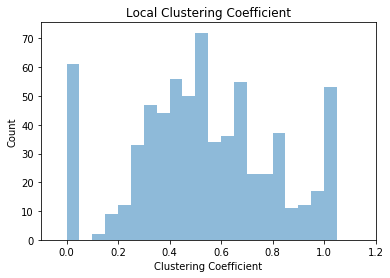

In [35]:
##CLUSTER COEFFICIENT 

#calcular transitivity
trans = nx.transitivity(G)
print("Transitivity: ", trans)

#calcular local clustering coefficient for all nodes
lcc = nx.clustering(G)

#calcular global clustering coefficient
gcc = nx.average_clustering(G)
print("Global Clustering Coefficient: ", gcc, '\n')

#CC of nodes from BC
#426, 98, 524
print('------ CC of nodes from BC ------')
print('Name: ', G.nodes[426]['name'] , '| CC:' ,lcc[426])
print('Name: ', G.nodes[98]['name'] , '| CC:' ,lcc[98])
print('Name: ', G.nodes[524]['name'] , '| CC:' ,lcc[524], '\n')

#High CC of nodes near BC
#427, 97, 520
print('------ High CC of nodes near BC ------')
print('Name: ', G.nodes[427]['name'] , '| CC:' ,lcc[427])
print('Name: ', G.nodes[97]['name'] , '| CC:' ,lcc[97])
print('Name: ', G.nodes[520]['name'] , '| CC:' ,lcc[520], '\n')

#Nodes with a really high CC
#106, 261, 262, 279
print('------ Some nodes with a really high CC ------')
print('Name: ', G.nodes[106]['name'] , '| CC:' ,lcc[106])
print('Name: ', G.nodes[261]['name'] , '| CC:' ,lcc[261])
print('Name: ', G.nodes[262]['name'] , '| CC:' ,lcc[262])
print('Name: ', G.nodes[279]['name'] , '| CC:' ,lcc[279], '\n')

#Histogram for local Cluster Coefficient

data = lcc.values()

# fixed bin size
bins = np.arange(-100, 100, 0.05) # fixed bin size

plt.xlim([min(data)-0.1, max(data)+0.2])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Local Clustering Coefficient')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Count')

plt.show()



In [38]:
#ASPL CODE

H = G.copy()
for i in sorted(nx.connected_components(H), key = len, reverse=True)[1:]:
    for j in i:
        H.remove_node(j)

len(sorted(nx.connected_components(H), key = len, reverse=True))
print(nx.average_shortest_path_length(H))
len(H.nodes())

3.4333379948082823


677